<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0923_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 도구 모음

In [ ]:
!pip install konlpy

In [74]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 파일 가져오기

In [3]:
df=pd.read_csv('./youtubecomment.csv',encoding='cp949')

In [50]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9182 entries, 0 to 9181
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    9182 non-null   object
 1   video    9182 non-null   object
 2   comment  9179 non-null   object
dtypes: object(3)
memory usage: 215.3+ KB


In [72]:
df

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디
...,...,...,...
9177,열무,8PEOg1YFqUU,꼭 해봐야겠네요 맛있게 잘 될것같아요
9178,열무,8PEOg1YFqUU,배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9179,열무,8PEOg1YFqUU,좋아요 꾹 입니다
9180,열무,8PEOg1YFqUU,"수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ..."


In [98]:
df2=df.dropna(how='any')

In [106]:
df2=df2.reset_index()

In [107]:
df2

,index,title,video,comment
0,0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,4,콩,eu7HhcuRsL4,나중에 해줘야디
...,...,...,...,...
9174,9177,열무,8PEOg1YFqUU,꼭 해봐야겠네요 맛있게 잘 될것같아요
9175,9178,열무,8PEOg1YFqUU,배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9176,9179,열무,8PEOg1YFqUU,좋아요 꾹 입니다
9177,9180,열무,8PEOg1YFqUU,"수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ..."


### 원하는 농수산물 선택해서 list에 담기

In [ ]:
lists=[]
ans=input()
for i in range(0,len(df2)):
  if df2['title'][i]==ans:
    lists.append(df2['comment'][i])
len(lists)


In [ ]:
# 담긴 내용 확인용
lists

### 이모티콘 제거
### 코멘트 df 생성 및 저장

In [6]:
import re

In [26]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
def apply_regular_expression(text):
    han = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]') # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = han.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [8]:
#코멘트 df생성 및 저장
comment_result = []
for i in range(0,len(lists)):
  tokens = re.sub(emoji_pattern,"", lists[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
#comment_result
comment_result.to_csv("./코멘트.csv",index=False, encoding='CP949')
type(comment_result)

pandas.core.frame.DataFrame

# 분석

### 명사 전처리 및 빈도 출력

In [9]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

In [ ]:
#확인용
morphs

In [11]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("또" not in word)and ("등" not in word)and ("앞" not in word)and ("생" not in word)and ("를" not in word)and ("여기" not in word)and ("다른" not in word)and ("예" not in word)and ("은" not in word)and ("위해" not in word)and ("다음" not in word)and ("대한" not in word)and ("아주" not in word)and ("그" not in word)and ("도움" not in word)and ("약" not in word)and ("때문" not in word)and ("여러" not in word) and ("더" not in word) and ("이" not in word) and ("의" not in word) and ("및" not in word) and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['대부분', '레시피', '요리', '정도', '병원', '남편', '간병', '콩', '요리', '집', '가면', '꼭', '해먹', '보고', '감사', '맛', '믹서기', '사야겄', '골목', '막걸리', '란', '콩', '캬', '뉴욕', '딸', '공유', '항상', '쌤', '멋', '유', 'Vega', '김치', '추가', '요', '김치', '콩', '몇', '지난', '여름', '콩', '갑자기', '녹두', '빈대떡', '녹두', '냉동', '보관', '콩', '믹서기', '갈고', '신', '김치', '맛', '녹두', '빈대떡', '진짜', '가루', '조금', '인지', '반죽', '거렸', '혹시', '콩전', '검색', '쌤', '최근', '레시피', '거', '진짜', '안', '콩', '쓰기', '최고', '듯', '비지', '못', '콩', '한번', 'gt', 'lt', '청양고추', '맛', '콩', '시도', '전', '실패', '듯해', '반죽', '콩', '런가', '전', '실패', '거', '진짜', '임', '콩', '진짜', '콩', '적도', '콩', '요리', '오늘', '콩전', '맛', '요', '부로', '해도', '요', '저', '좀', '뭘', '요', '용', '거기', '다가', '모양', '콩전', '조치', '캬', '막걸리', '한잔', '음', '맛', '어유', '유', 'Bin', 'De', 'Tuck', 'reads', 'better', 'for', 'English', 'speakers', '대표', '콩전', 'Can', 'someone', 'tell', 'me', 'how', 'to', 'make', 'the', 'dipping', 'sauce', 'pls', 'Thank', 'you', '보통', '왜', '콩', '곡물', '어차피', '때', '보기', '콩', '알', '밥알', '갠', '기분', '부부', '식', '우렁각시', '티브', '백종원', '좀'

In [12]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'콩': 280, '맛': 280, '땅콩': 264, '버터': 244, '진짜': 196, '요리': 172, '레시피': 168, '거': 160, '요': 152, '저': 136, '음식': 120, '집': 116, 'b': 112, '두부': 104, '해먹': 92, '오늘': 92, '백종원': 92, '해': 92, '쌤': 88, '최고': 88, '좀': 80, '꼭': 76, '때': 72, '설탕': 72, '물': 64, '콩전': 56, '안': 56, '우유': 56, '소금': 52, '재료': 52, 'g': 52, '술': 52, '김치': 48, '해도': 48, '우리': 48, '국물': 48, '믹서기': 44, '항상': 44, '대표': 44, '영상': 44, '팀': 44, '해외': 44, '사람': 44, '양념장': 44, '유': 40, 'the': 40, '두유': 40, 'I': 40, 'it': 40, '뭐': 40, '아몬드': 40, '고기': 36, '늘': 36, '콩국': 36, '콩물': 36, '정도': 32, '보고': 32, '여름': 32, '한번': 32, '전': 32, '왜': 32, '날': 32, '살': 32, '맛술': 32, '대박': 32, '방법': 32, '대신': 32, '인분': 32, '빈대떡': 28, '가루': 28, '혹시': 28, '간장': 28, '콩가루': 28, '애': 28, '줄': 28, '밥': 28, 'of': 28, '삼겹살': 28, '덕분': 28, '식당': 28, '양념': 28, '번': 28, '면': 28, '깨': 28, '미원': 28, '건강': 28, '머리': 28, '막걸리': 24, '비지': 24, '못': 24, 'for': 24, '알': 24, '모두': 24, '걱정': 24, '빛': 24, '분': 24, '자주': 24, '구': 24, '한국': 24, '시간': 24, '뭔가': 24, 

### 시각화

In [13]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

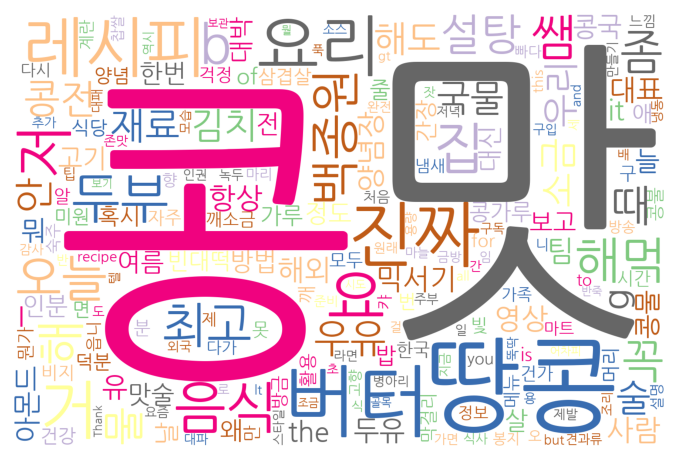

In [14]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### 그래프

In [15]:
import matplotlib.pylab as plt2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = "/content/NanumSquareL.ttf"
fontprop = fm.FontProperties(fname=path, size=20) # 글자 크기 조정

In [16]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)



pandas.core.frame.DataFrame

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


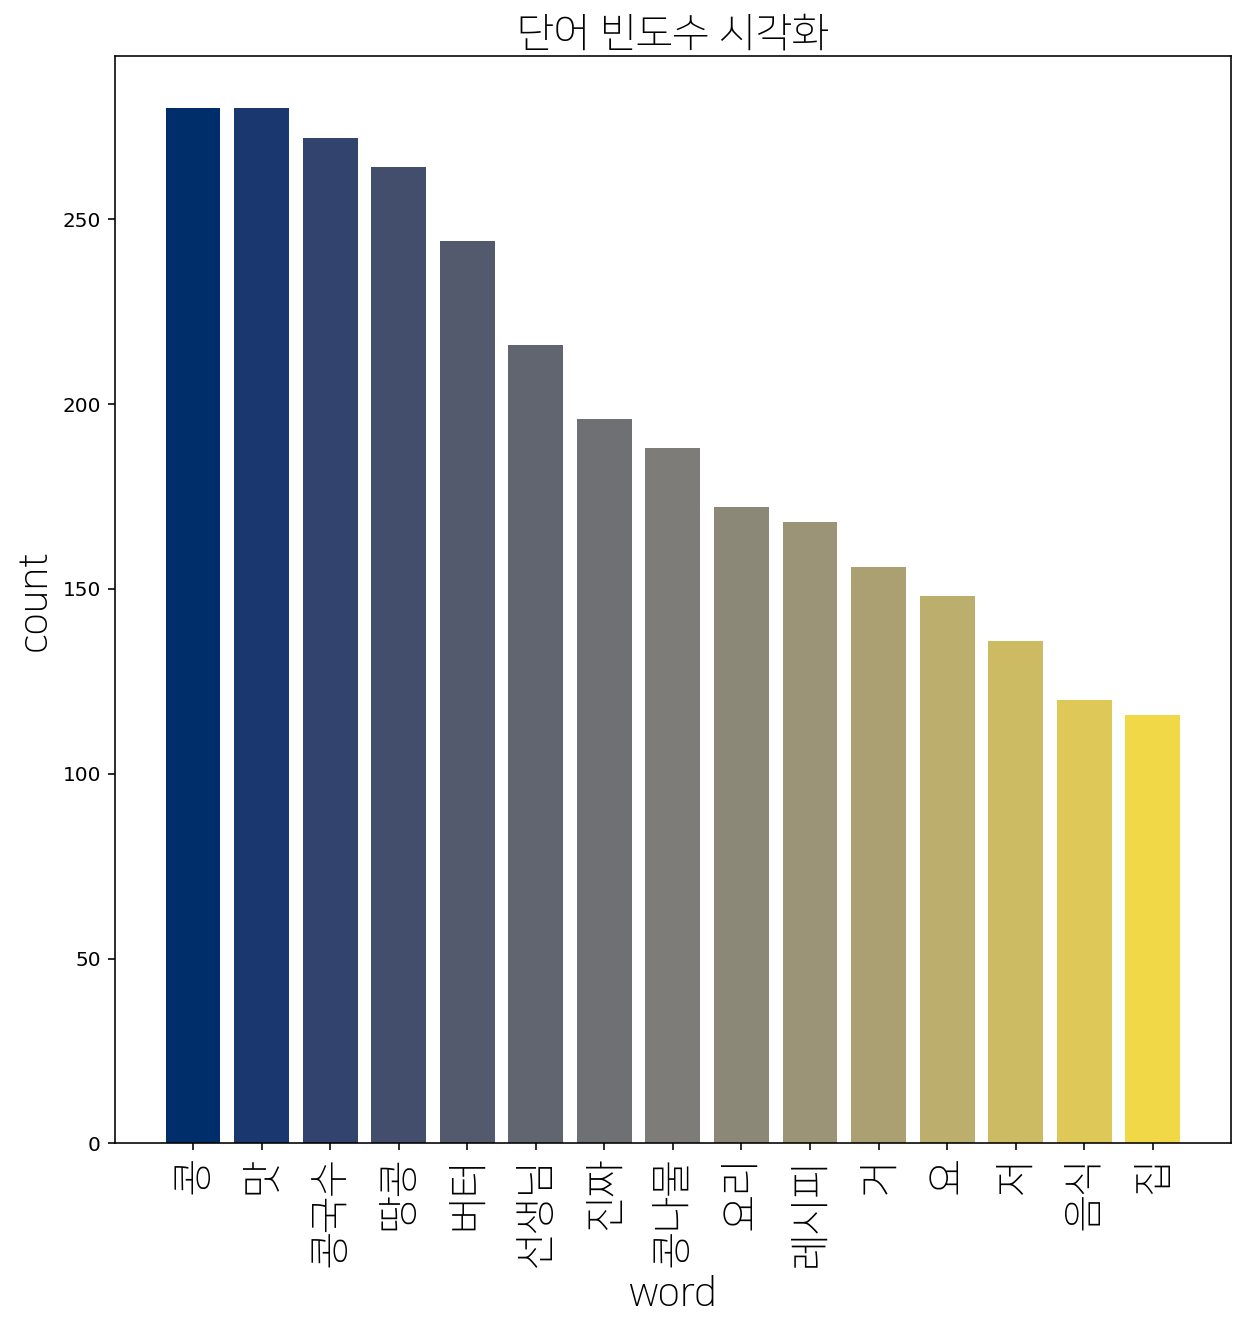

In [17]:

noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

#차트에 컬러넣기
import seaborn as sns
colors = sns.color_palette('cividis',len(test))
#그리고 밑에다가 plt.차트형식(괄호 안에 color=추가)



index = np.arange(len(test))
plt2.bar(index,test['count'].tolist(),color=colors)
plt2.xlabel('word', fontsize=8, fontproperties=fontprop)
plt2.ylabel('count', fontsize=8, fontproperties=fontprop)
plt2.xticks(index, test['word'].tolist(), fontsize=1, fontproperties=fontprop, rotation=90)
plt2.title('단어 빈도수 시각화',  fontsize=12, fontproperties=fontprop)
plt2.rcParams['figure.figsize'] = [10, 5]
fig2 = plt2.figure(1)
fig2.set_size_inches(10, 10) # 사이즈 조정

plt2.show()



### komoran

In [18]:
from konlpy.tag import Komoran
komoran=Komoran()

In [ ]:
ko_tokens=komoran.morphs(comment_result['comment'][29])
ko_tokens

In [ ]:
nouns=komoran.nouns(comment_result['comment'][29])
nouns=[noun for noun in nouns if len(noun)>=2]
nouns

In [ ]:
comment_result

### 긍정 부정 분석

In [77]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result



#### ex)

In [78]:
df['comment'][0]

'대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아요 병원서 남편 간병하고있는데 콩요리를 좋아해서 집에가면 꼭 해먹어보고 싶네요 감사요~^^'

In [80]:
apply_regular_expression(df['comment'][0])

'대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아요 병원서 남편 간병하고있는데 콩요리를 좋아해서 집에가면 꼭 해먹어보고 싶네요 감사요'

In [81]:
from konlpy.tag import Okt
from collections import Counter

#### 명사 형태소 추출 함수

In [ ]:
okt = Okt()
nouns = okt.nouns(apply_regular_expression(df['comment'][0]))
nouns

#### 말뭉치 생성

In [ ]:
corpus = "".join(df2['comment'].tolist())
corpus


불용어구 삭제

In [ ]:
apply_regular_expression(corpus)

#### 전체 말뭉치에서 명사 형태소 추출

In [111]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['대부분', '레시피', '요리', '정도', '더', '이해', '병원', '남편', '간병', '콩', '요리', '집', '가면', '꼭', '해먹', '보고', '감사', '맛', '믹서기', '겄', '골목', '막걸리', '란', '콩', '전이', '캬', '뉴욕', '딸', '공유', '나중', '항상', '쌤', '멋', '유', '김치', '추가', '김치', '콩', '더', '몇', '지난', '여름', '콩국수', '콩', '갑자기', '녹두', '빈대떡', '녹두', '냉동', '보관', '콩', '믹서기', '갈고', '신', '김치', '맛', '녹두', '빈대떡', '진짜', '그때', '가루', '조금', '인지', '반죽', '약간', '거렸', '혹시', '콩전', '검색', '쌤', '최근', '레시피', '거', '진짜', '안', '콩', '쓰기', '최고', '듯', '비지', '못', '콩', '한번', '그닥', '청양고추', '맛', '콩', '시도', '전', '실패', '듯해', '반죽', '콩', '런가', '전', '실패', '거', '진짜', '임', '내', '콩', '진짜', '콩', '적도', '콩', '요리', '오늘', '콩전', '맛', '부로', '해도', '요', '저', '좀', '더', '것', '뭘', '요', '계란후라이', '용', '프라이팬', '거기', '다가', '모양', '콩전', '조치', '캬', '막걸리', '한잔', '갑', '당음', '맛', '어유', '유', '대표', '콩전', '보통', '왜', '콩', '곡물', '어차피', '때', '수분', '보기', '콩', '알', '밥알', '갠', '기분', '부부', '식', '우렁각시', '티브', '백종원', '좀', '늘', '처치', '곤란', '병아리', '콩', '광장시장', '빈대떡', '맛', '이나', '쌤', '장아찌', '간장', '파랑', '최고', '우리', '집', '콩', '고민',

#### 빈도수 세기

In [112]:
counter = Counter(nouns)

In [113]:
counter.most_common(10)

[('맛', 948),
 ('요리', 864),
 ('선생님', 770),
 ('진짜', 724),
 ('백종원', 635),
 ('거', 587),
 ('레시피', 458),
 ('저', 455),
 ('정말', 446),
 ('때', 444)]

* 한글자 명사 제거
* 위 결과에서 보이듯이, 두 글자 키워드가 대부분 의미 있는 단어지만, ‘수’, ‘것’, '곳’과 같은 한 글자 키워드는 분석에 딱히 좋은 영향을 미치지 않은 것으로 보입니다. 그래서 우리는 한글자 명사를 제거해보도록 하겠습니다.



In [ ]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

##### 불용어 사전

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

불용어 사전에 추가하기

In [127]:
recipy_words=[]
recipy_word = ['백쌤', '백종원','매력','보다','힐링','요린이','에어프라이어','존맛탱','요식업','겁나','썸네일','존귀','썸넬','개맛없씀']
for word in recipy_word:
    recipy_words.append(word)

##### word count**

BoW 벡터 생성

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in recipy_words]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df2['comment'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)


#### 단어 리스트

In [ ]:
word_list

In [129]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 1,  3, 40, ...,  2,  4,  5])

👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻👻

In [130]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [131]:
bow_vect.shape

(9179, 5303)

##### "단어" - "총 등장 횟수" Matching


In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

#### TF-IDF 변환

* Bag of Words 벡터에 대해서 TF-IDF변환 진행합니다.

In [133]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

* 한 행(row)은 한 리뷰를 의미
* 한 열(column)은 한 단어를 의미

In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())


##### “벡터” - “단어” mapping

In [ ]:
vect.vocabulary_

In [138]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{972: '대부분', 1278: '레시피', 3344: '요리', 3970: '정도', 3646: '이해', 1944: '병원', 724: '남편', 76: '간병', 25: '...


### 감성 분류 - Logistic Regression

#### Label